In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_auc_score,roc_curve,f1_score
from sklearn import tree
from imblearn.over_sampling import SMOTE
import seaborn as sns
import os
import gc
import altair as alt
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

### Data Import

In [2]:
train_id= pd.read_csv("train_identity.csv",index_col='TransactionID')
train_tran= pd.read_csv('train_transaction.csv',index_col='TransactionID')
#test_id = pd.read_csv("test_identity.csv",index_col='TransactionID')
#test_tran = pd.read_csv("test_transaction.csv",index_col='TransactionID')

In [3]:
train_tran.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.

TransactionDT: timedelta from a given reference datetime (not an actual timestamp) 

TransactionAMT: transaction payment amount in USD

ProductCD: product code, the product for each transaction

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address

dist: distance

P_ and (R__) emaildomain: purchaser and recipient email domain

C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

D1-D15: timedelta, such as days between previous transaction, etc.

M1-M9: match, such as names on card and address, etc.

Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Categorical Features - Transaction

ProductCD

card1 - card6

addr1, addr2

P_emaildomain

R_emaildomain

M1 - M9

Categorical Features - Identity

DeviceType

DeviceInfo

id_12 - id_38


In [4]:
#test_tran.head(15) 

In [5]:
train_id.head(10)

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,18.0,529.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,15.0,352.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [6]:
print("train_tran dataset shape",train_tran.shape)
print("train_id dataset shape",train_id.shape)
#print("test_tran dataset shape",test_tran.shape)
#print("test_id dataset shape",test_id.shape)

train_tran dataset shape (590540, 393)
train_id dataset shape (144233, 40)


In [7]:
tran_category_name = ['isFraud',
                      'ProductCD',
                      'card1','card2','card3','card4','card5','card6',
                      'addr1', 'addr2',
                      'P_emaildomain','R_emaildomain',
                      'M1','M2','M3','M4','M5','M6','M7','M8','M9']
    
id_category_name_train = ['DeviceType','DeviceInfo'] + ['id_'+str(x) for x in range(12,39)]
#id_category_name_test = ['DeviceType','DeviceInfo'] + ['id-'+str(x) for x in range(12,39)]

tran_col_name = list(train_tran.columns) 
               # ['V'+str(x) for x in range(1,340)]
id_col_name = list(train_id.columns) 

False    569877
True      20663
Name: isFraud, dtype: int64

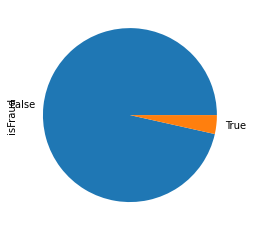

In [8]:
train_tran['isFraud'].astype(bool).value_counts().plot.pie()
train_tran['isFraud'].astype(bool).value_counts()

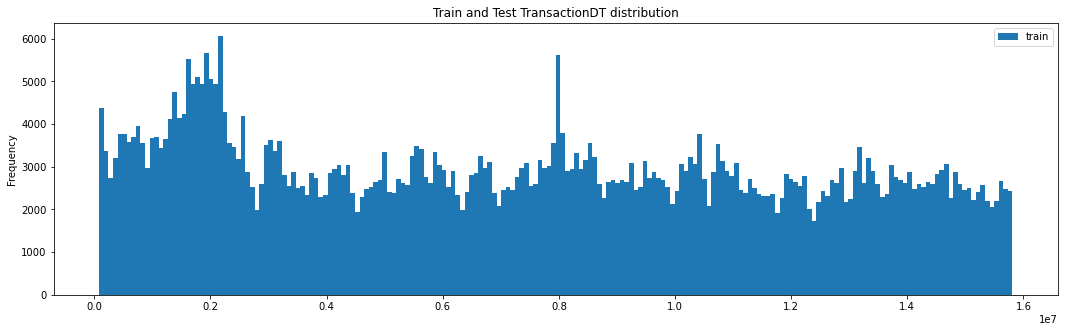

In [9]:
train_tran['TransactionDT'].plot(kind='hist', figsize=(18,5), label='train', bins=200, title='Train and Test TransactionDT distribution')
plt.legend()
plt.show()

In [10]:
train_df = train_tran.merge(train_id, how='left', left_index=True, right_index=True)

In [11]:
train_df.head()
train_df.shape

(590540, 433)

#Variable Simplify Refer to Notebook V col simplification

In [12]:
v =  [1, 3, 4, 6, 8, 11]
v += [13, 14, 17, 20, 23, 26, 27, 30]
v += [36, 37, 40, 41, 44, 47, 48]
v += [54, 56, 59, 62, 65, 67, 68, 70]
v += [76, 78, 80, 82, 86, 88, 89, 91]

#v += [96, 98, 99, 104] #relates to groups, no NAN 
v += [107, 108, 111, 115, 117, 120, 121, 123] # maybe group, no NAN
v += [124, 127, 129, 130, 136] # relates to groups, no NAN

# LOTS OF NAN BELOW
v += [138, 139, 142, 147, 156, 162] #b1
v += [165, 160, 166] #b1
v += [178, 176, 173, 182] #b2
v += [187, 203, 205, 207, 215] #b2
v += [169, 171, 175, 180, 185, 188, 198, 210, 209] #b2
v += [218, 223, 224, 226, 228, 229, 235] #b3
v += [240, 258, 257, 253, 252, 260, 261] #b3
v += [264, 266, 267, 274, 277] #b3
v += [220, 221, 234, 238, 250, 271] #b3

v += [294, 284, 285, 286, 291, 297] # relates to grous, no NAN
v += [303, 305, 307, 309, 310, 320] # relates to groups, no NAN
v += [281, 283, 289, 296, 301, 314]

# Data Exploration

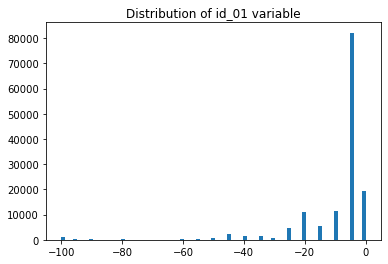

In [13]:
plt.hist(train_df['id_01'], bins=77);
plt.title('Distribution of id_01 variable');

id_01 has an interesting distribution: it has 77 unique non-positive values with skeweness to 0.

In [14]:
train_df['id_03'].value_counts(dropna=False, normalize=True).head()

NaN    0.887689
0.0    0.108211
1.0    0.001461
3.0    0.001131
2.0    0.000713
Name: id_03, dtype: float64

id_03 has 88% of missing values and 98% of values are either missing or equal to 0

In [15]:
train_df['id_11'].value_counts(dropna=False, normalize=True).head()

NaN           0.761273
100.000000    0.225492
95.080002     0.002085
95.160004     0.001277
97.120003     0.000745
Name: id_11, dtype: float64

22% of values in id_11 are equal to 100and 76% are missing. Quite strange.

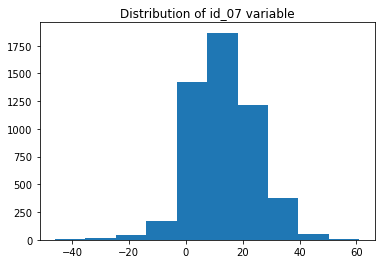

In [16]:
plt.hist(train_df['id_07']);
plt.title('Distribution of id_07 variable');

Some of features seem to be normalized. So if someone wants to normalize all variables, it would be necessary to separate such variables which seem to be already normalized.

C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vince\anaconda3\lib\si

<AxesSubplot:xlabel='id_35', ylabel='count'>

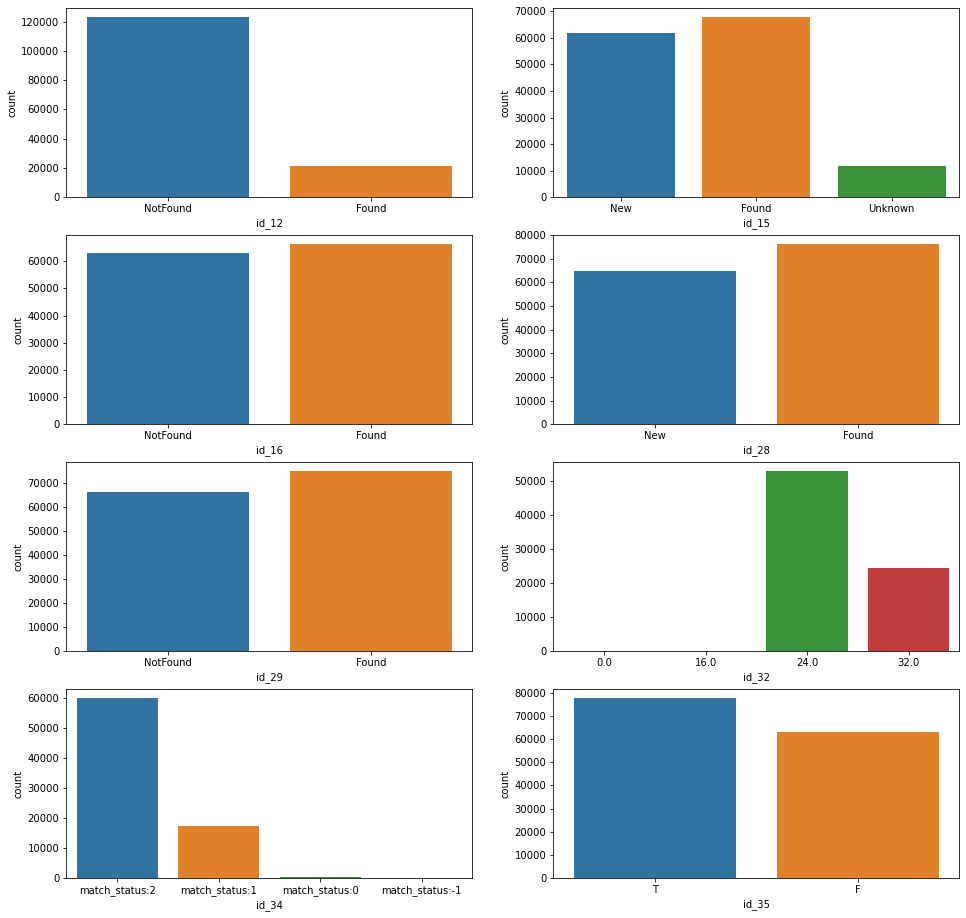

In [17]:
plt.figure(figsize=(16,16))
plt.figure(1)
ax1 = plt.subplot(421)
sns.countplot(train_df['id_12'])
ax2 = plt.subplot(422)
sns.countplot(train_df['id_15'])
ax3 = plt.subplot(423)
sns.countplot(train_df['id_16'])
ax4 = plt.subplot(424)
sns.countplot(train_df['id_28'])
ax5 = plt.subplot(425)
sns.countplot(train_df['id_29'])
ax6 = plt.subplot(426)
sns.countplot(train_df['id_32'])
ax7 = plt.subplot(427)
sns.countplot(train_df['id_34'])
ax8 = plt.subplot(428)
sns.countplot(train_df['id_35'])

C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='id_38', ylabel='count'>

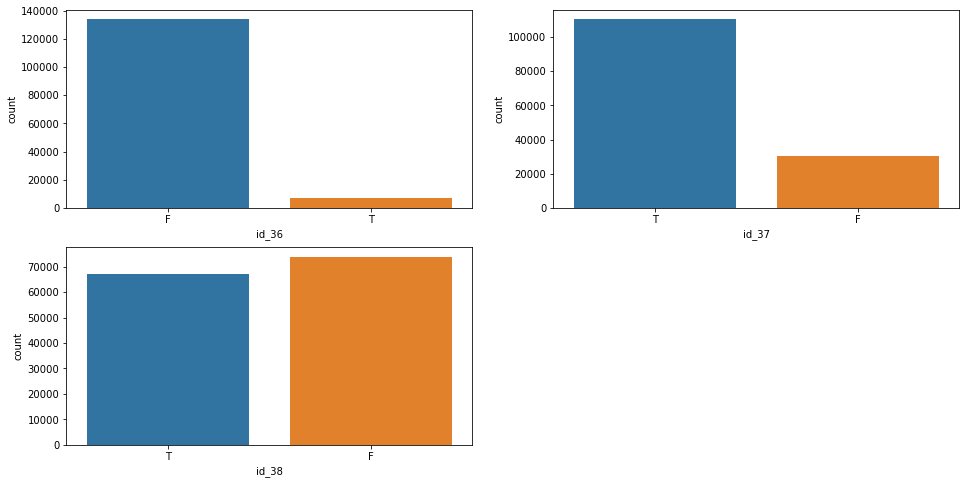

In [18]:
plt.figure(figsize=(16,8))
plt.figure(1)
ax1 = plt.subplot(221)
sns.countplot(train_df['id_36'])
ax2 = plt.subplot(222)
sns.countplot(train_df['id_37'])
ax3 = plt.subplot(223)
sns.countplot(train_df['id_38'])

C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='id_30', ylabel='count'>

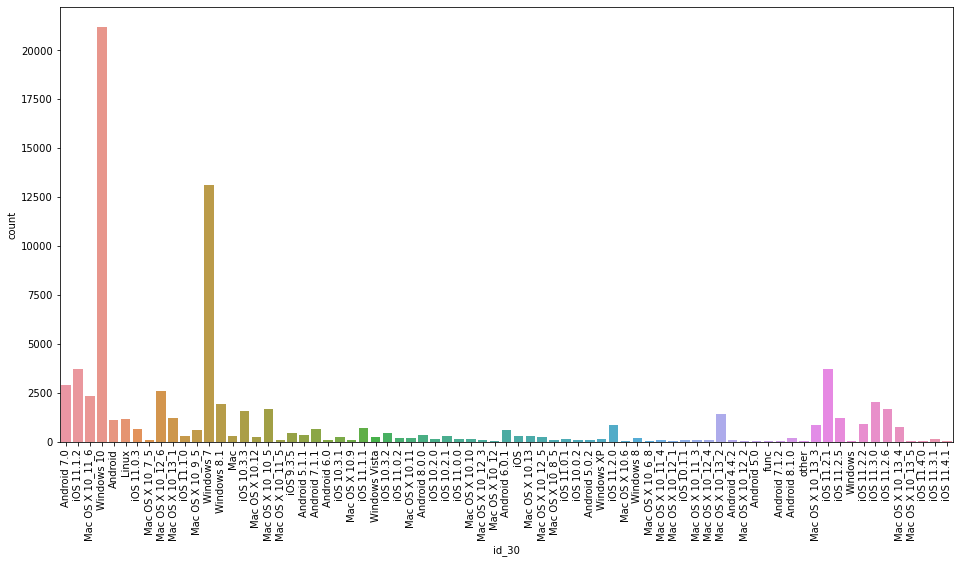

In [19]:
plt.figure(figsize=(16,8))
plt.figure(1)
plt.xticks(rotation = 90)
sns.countplot(train_df['id_30'])

C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='id_31', ylabel='count'>

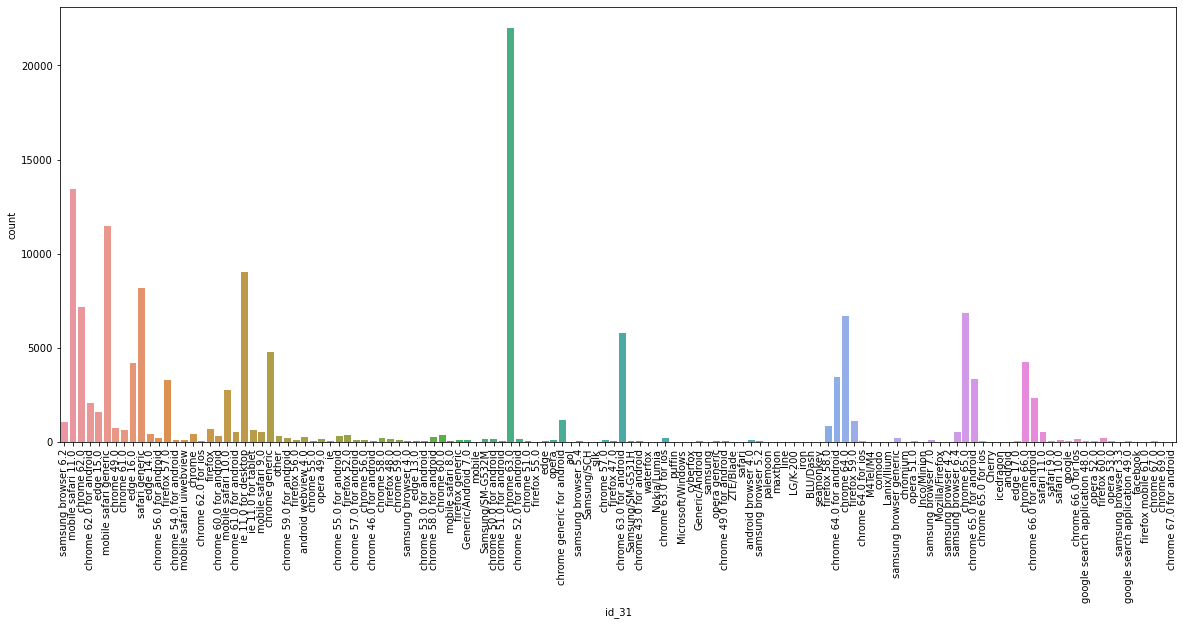

In [20]:
plt.figure(figsize=(20,8))
plt.figure(1)
plt.xticks(rotation = 90)
sns.countplot(train_df['id_31'])

C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='id_33', ylabel='count'>

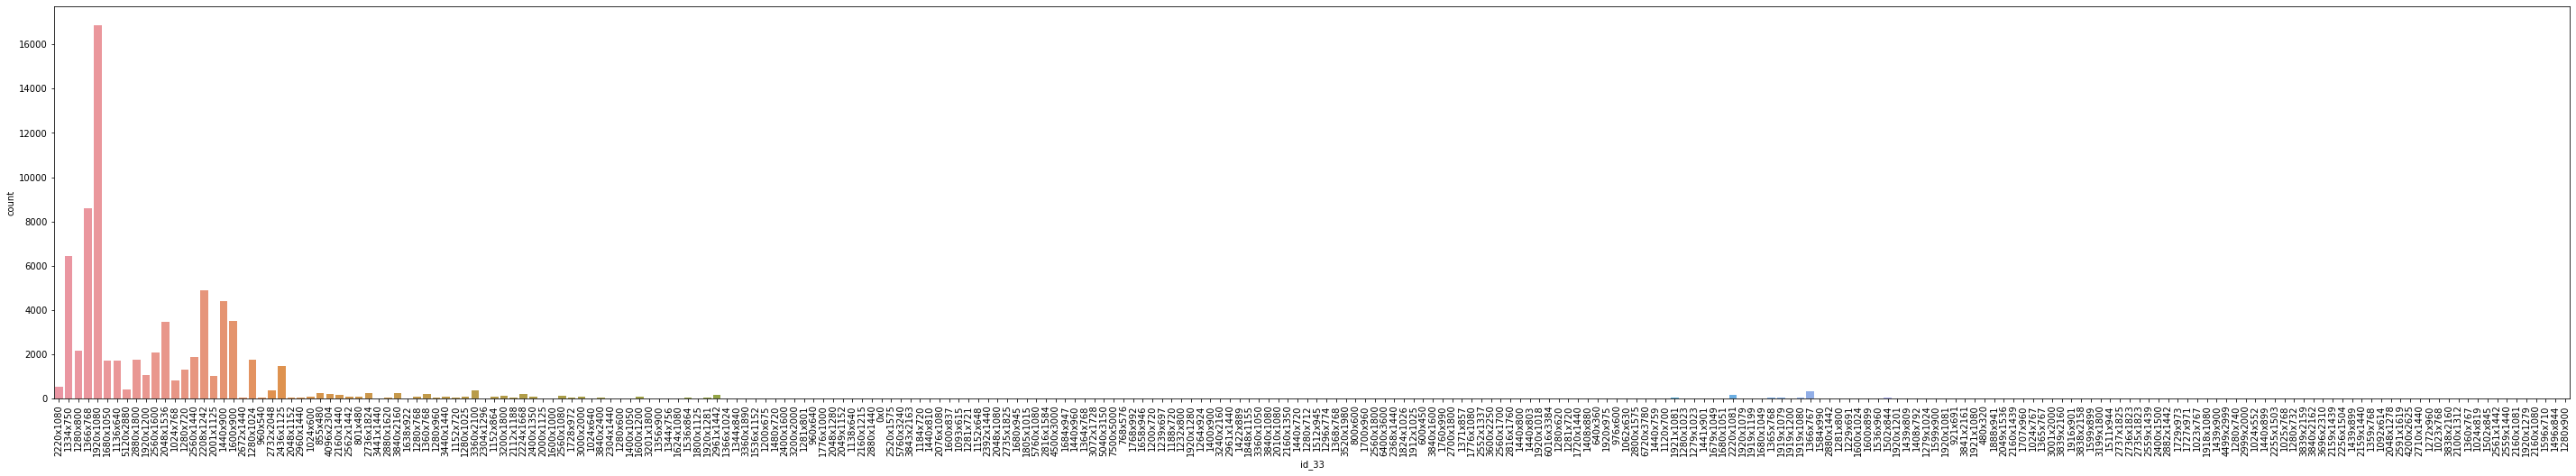

In [21]:
plt.figure(figsize=(50,8))
plt.figure(1)
plt.xticks(rotation = 90)
sns.countplot(train_df['id_33'])

C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

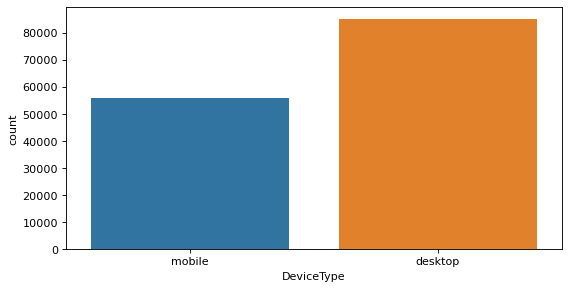

In [22]:
plt.figure(figsize=(8,4),dpi = 80)
plt.figure(1)
#plt.xticks(rotation = 90)
sns.countplot(train_df['DeviceType'])
train_df['DeviceType'].value_counts()

In [23]:
# plt.figure(figsize=(100,80))
# plt.figure(1)
# plt.xticks(rotation = 90)
# sns.countplot(train_df['DeviceInfo'])
train_df['DeviceInfo'].value_counts()

Windows                                        47722
iOS Device                                     19782
MacOS                                          12573
Trident/7.0                                     7440
rv:11.0                                         1901
rv:57.0                                          962
SM-J700M Build/MMB29K                            549
SM-G610M Build/MMB29K                            461
SM-G531H Build/LMY48B                            410
rv:59.0                                          362
SM-G935F Build/NRD90M                            334
SM-G955U Build/NRD90M                            328
SM-G532M Build/MMB29T                            316
ALE-L23 Build/HuaweiALE-L23                      312
SM-G950U Build/NRD90M                            290
SM-G930V Build/NRD90M                            274
rv:58.0                                          269
rv:52.0                                          256
SAMSUNG                                       

C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vince\anaconda3\lib\si

<AxesSubplot:xlabel='M5', ylabel='count'>

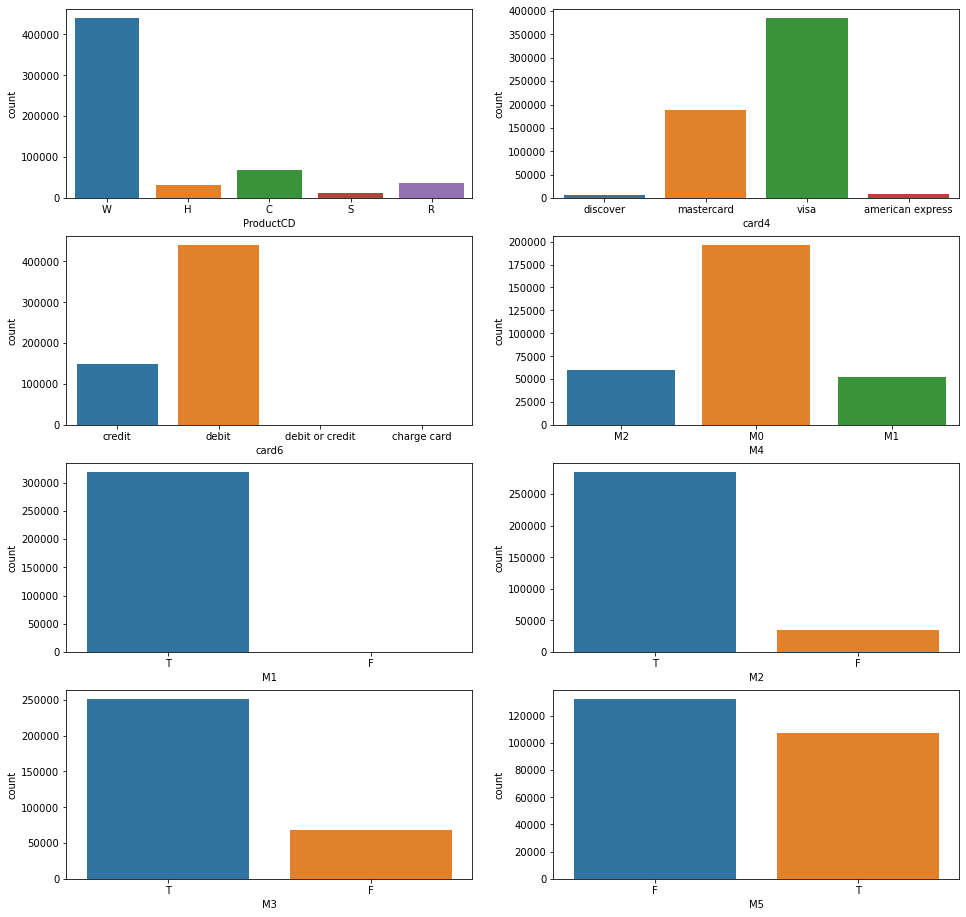

In [24]:
plt.figure(figsize=(16,16))
plt.figure(1)
ax1 = plt.subplot(421)
sns.countplot(train_df['ProductCD'])
ax2 = plt.subplot(422)
sns.countplot(train_df['card4'])
ax3 = plt.subplot(423)
sns.countplot(train_df['card6'])
ax4 = plt.subplot(424)
sns.countplot(train_df['M4'])
ax5 = plt.subplot(425)
sns.countplot(train_df['M1'])
ax6 = plt.subplot(426)
sns.countplot(train_df['M2'])
ax7 = plt.subplot(427)
sns.countplot(train_df['M3'])
ax8 = plt.subplot(428)
sns.countplot(train_df['M5'])

C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vince\anaconda3\lib\si

<AxesSubplot:xlabel='M9', ylabel='count'>

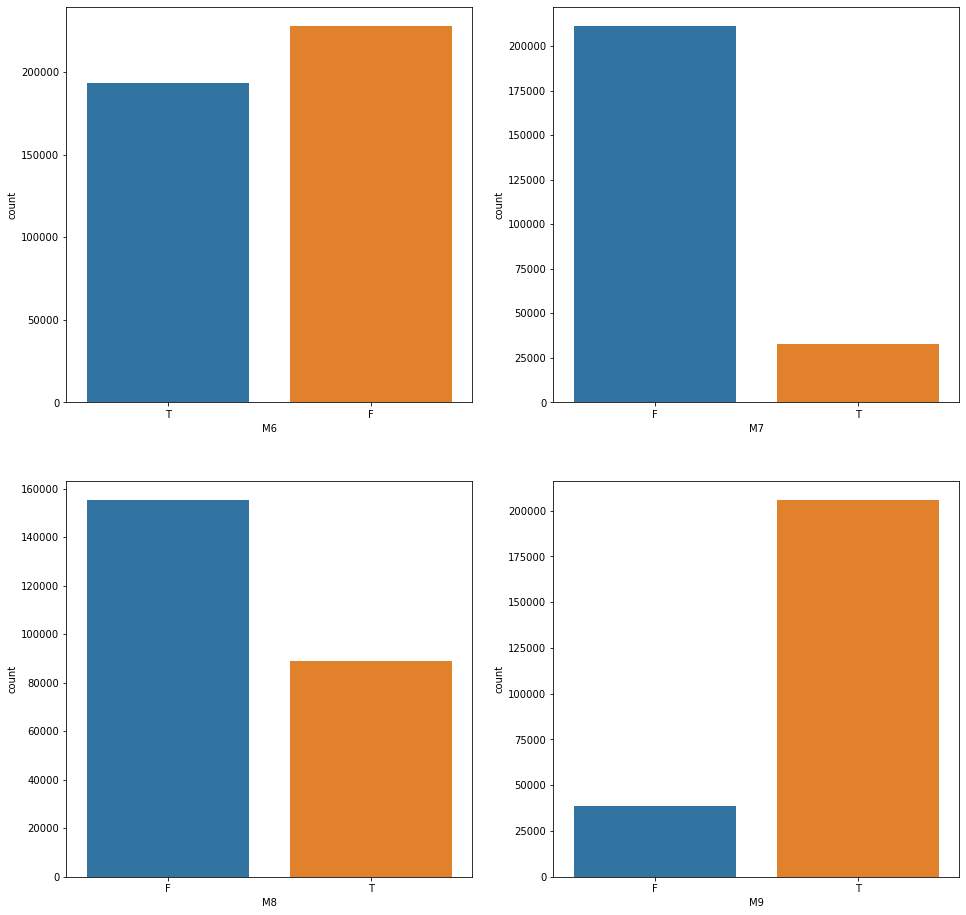

In [25]:
plt.figure(figsize=(16,16))
plt.figure(1)
ax1 = plt.subplot(221)
sns.countplot(train_df['M6'])
ax2 = plt.subplot(222)
sns.countplot(train_df['M7'])
ax3 = plt.subplot(223)
sns.countplot(train_df['M8'])
ax4 = plt.subplot(224)
sns.countplot(train_df['M9'])

C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='P_emaildomain', ylabel='count'>

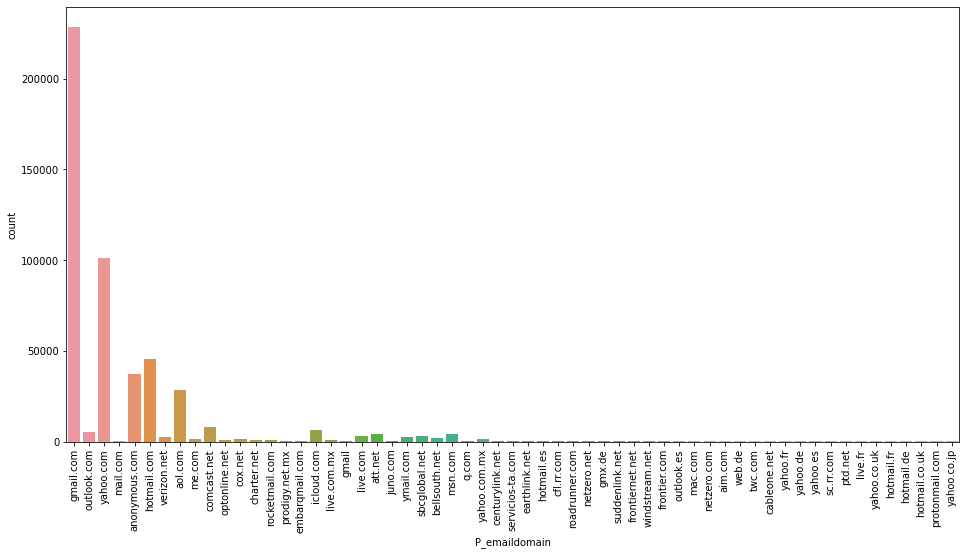

In [26]:
plt.figure(figsize=(16,8))
plt.figure(1)
plt.xticks(rotation = 90)
sns.countplot(train_df['P_emaildomain'])

C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R_emaildomain', ylabel='count'>

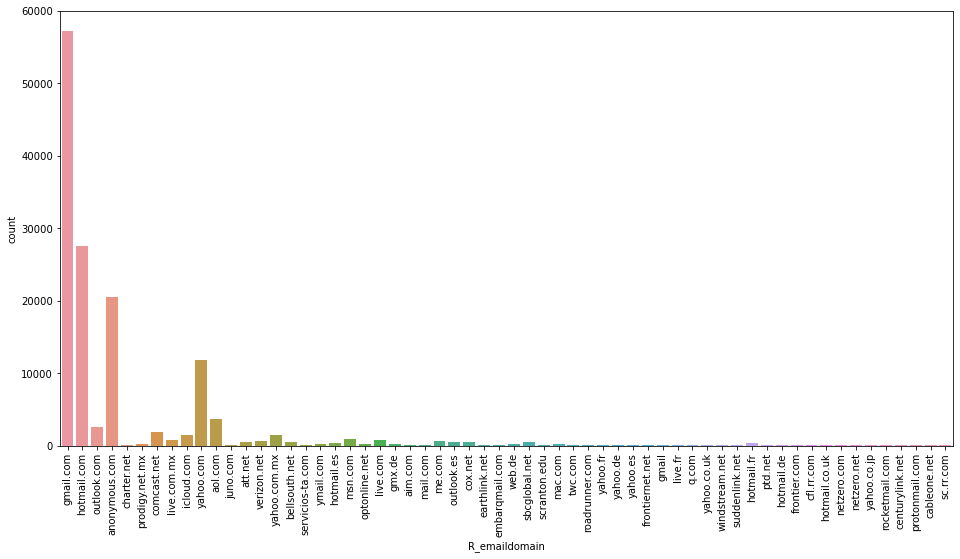

In [27]:
plt.figure(figsize=(16,8))
plt.figure(1)
plt.xticks(rotation = 90)
sns.countplot(train_df['R_emaildomain'])

C:\Users\vince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

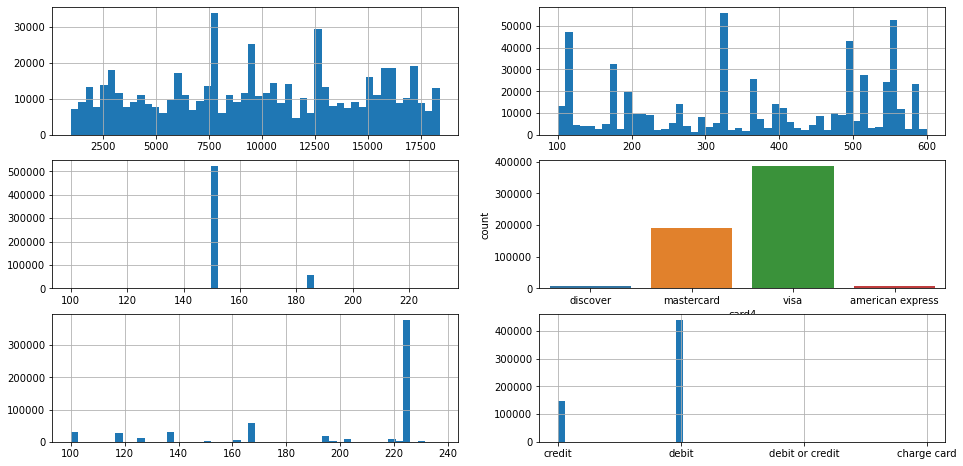

In [28]:
plt.figure(figsize=(16,8))
plt.figure(1)
plt.xticks(rotation = 90)
ax1 = plt.subplot(321)
train_df['card1'].hist(bins = 50)
ax2 = plt.subplot(322)
train_df['card2'].hist(bins = 50)
ax3 = plt.subplot(323)
train_df['card3'].hist(bins = 50)
ax4 = plt.subplot(324)
sns.countplot(train_df['card4'])
ax5 = plt.subplot(325)
train_df['card5'].hist(bins = 50)
ax6 = plt.subplot(326)
train_df['card6'].hist(bins = 50)

In [29]:
train_df['addr2'].value_counts()

87.0     520481
60.0       3084
96.0        638
32.0         91
65.0         82
16.0         55
31.0         47
19.0         33
26.0         25
27.0         20
69.0         17
59.0         17
34.0         16
43.0         12
102.0        11
29.0         11
98.0         11
68.0         10
57.0         10
78.0          8
10.0          8
71.0          7
17.0          7
13.0          7
72.0          6
54.0          6
88.0          5
52.0          5
73.0          5
21.0          5
48.0          4
62.0          4
30.0          4
51.0          4
47.0          4
101.0         4
28.0          4
46.0          3
24.0          3
39.0          3
38.0          3
74.0          3
18.0          3
40.0          3
20.0          3
61.0          3
44.0          3
23.0          2
86.0          2
76.0          2
97.0          2
63.0          2
100.0         2
66.0          2
36.0          2
92.0          2
82.0          1
94.0          1
55.0          1
89.0          1
15.0          1
84.0          1
79.0    

In [30]:
train_df['addr1'].value_counts()

299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
315.0    23078
441.0    20827
272.0    20141
123.0    16105
126.0    15243
184.0    15160
337.0    15149
191.0    14979
181.0    13856
143.0     9806
476.0     9478
310.0     8486
472.0     8478
327.0     8425
512.0     8268
387.0     8187
433.0     7831
231.0     7605
485.0     6816
269.0     6404
205.0     5725
225.0     5323
251.0     5216
494.0     5065
220.0     5041
226.0     4867
498.0     4744
177.0     4674
203.0     3808
420.0     3581
110.0     3220
436.0     3169
469.0     2940
324.0     2173
444.0     2033
170.0     2001
343.0     1734
384.0     1670
122.0     1617
194.0     1572
158.0     1562
428.0     1425
308.0     1279
253.0     1058
492.0      987
448.0      923
502.0      835
284.0      773
465.0      503
161.0      421
296.0      367
130.0      342
536.0      309
157.0      169
511.0      157
418.0      101
148.0       96
356.0       90
348.0       85
242.0       84
508.0       70
254.0     

In [31]:
train_df.isnull().sum()

isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5                309841
D6                517353
D7                551623
D8                515614
D9                515614
D10                76022


In [32]:
#train_df[cols_num].describe().transpose()

We notice there are many NaN data in the training dataset, we directly fill in NaN with -999 because in XGboost every NaN would be an root, so number -999 we could XXXXXXX

In [33]:
train_df = train_df.fillna(-999)

In [34]:
train_df.isnull().sum().sum()
#No more NaN value

0

In [35]:
train_df[tran_category_name+id_category_name_train] = train_df[tran_category_name+id_category_name_train].astype('category')

In [36]:
col_name_1 =['isFraud'] + ['TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9'] + ['V'+str(x) for x in v] 
col_name_1 += id_col_name
#col_name_1

In [37]:
X = train_df[col_name_1].drop(['isFraud'],axis = 1)

Y = train_df['isFraud']
X.shape


(590540, 213)

In [38]:
X.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V3,V4,V6,V8,V11,V13,V14,V17,V20,V23,V26,V27,V30,V36,V37,V40,V41,V44,V47,V48,V54,V56,V59,V62,V65,V67,V68,V70,V76,V78,V80,V82,V86,V88,V89,V91,V107,V108,V111,V115,V117,V120,V121,V123,V124,V127,V129,V130,V136,V138,V139,V142,V147,V156,V162,V165,V160,V166,V178,V176,V173,V182,V187,V203,V205,V207,V215,V169,V171,V175,V180,V185,V188,V198,V210,V209,V218,V223,V224,V226,V228,V229,V235,V240,V258,V257,V253,V252,V260,V261,V264,V266,V267,V274,V277,V220,V221,V234,V238,V250,V271,V294,V284,V285,V286,V291,V297,V303,V305,V307,V309,V310,V320,V281,V283,V289,V296,V301,V314,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,86400,68.5,W,13926,-999.0,150.0,discover,142.0,credit,315.0,87.0,19.0,-999.0,-999,-999,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,-999.0,13.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,13.0,13.0,-999.0,-999.0,-999.0,0.0,T,T,T,M2,F,T,-999,-999,-999,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,117.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,117.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999,-999,-999,-999,-999.0,-999,-999,-999,-999,-999,-999,-999,-999
2987001,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,-999.0,-999.0,gmail.com,-999,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,0.0,-999,-999,-999,M0,T,T,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999,-999,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999,-999,-999,-999,-999.0,-999,-999,-999,-999,-999,-999,-999,-999
2987002,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,-999.0,outlook.com,-999,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,315.0,-999.0,-999.0,-999.0,315.0,T,T,T,M0,F,F,F,F,F,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1

In [39]:
#X.dtypes

Outlier Removal / Relax / Smooth / PCA
Normally you want to remove anomalies from your data because they confuse your models. However in this competition, we want to find anomalies so use smoothing techniques carefully. The idea behind these methods is to determine and remove uncommon values. For example, by using frequency encoding of a variable, you can remove all values that appear less than 0.1% by replacing them with a new value like -9999 (note that you should use a different value than what you used for NAN).

# Local Validation

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 110)

In [41]:
cols = list(X_train.columns)
cols_category = tran_category_name+id_category_name_train
cols_category.remove('isFraud')
cols_category
cols_num = set(cols)- set(cols_category)

In [42]:
# Categorical Features - Transaction
# ProductCD
# card1 - card6
# addr1, addr2
# P_emaildomain
# R_emaildomain
# M1 - M9

# Categorical Features - Identity
# DeviceType
# DeviceInfo
# id_12 - id_38


In [43]:
#X_train.dtypes

### XGBoost

In [44]:
xgb_model = xgb.XGBClassifier( 
        n_estimators=2000,
        max_depth=12, 
        learning_rate=0.02, 
        subsample=0.8,
        colsample_bytree=0.4, 
        missing=-1, 
        eval_metric='auc',
        # USE CPU
        #nthread=4,
        #tree_method='hist' 
        # USE GPU
        tree_method='gpu_hist',
        enable_categorical=True
    )
h = xgb_model.fit(X_train, Y_train, 
    eval_set=[(X_train,Y_train)],
    verbose=50, early_stopping_rounds=100)

C:\Users\vince\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\vince\anaconda3\lib\site-packages\xgboost\data.py:290: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
C:\Users\vince\anaconda3\lib\site-packages\xgboost\data.py:284: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

[0]	validation_0-auc:0.83676
[50]	validation_0-auc:0.90309
[100]	validation_0-auc:0.92365
[150]	validation_0-auc:0.94021
[200]	validation_0-auc:0.95489
[250]	validation_0-auc:0.96624
[300]	validation_0-auc:0.97306
[350]	validation_0-auc:0.97758
[400]	validation_0-auc:0.98003
[450]	validation_0-auc:0.98163
[500]	validation_0-auc:0.98280
[550]	validation_0-auc:0.98394
[600]	validation_0-auc:0.98487
[650]	validation_0-auc:0.98567
[700]	validation_0-auc:0.98645
[750]	validation_0-auc:0.98700
[800]	validation_0-auc:0.98756
[850]	validation_0-auc:0.98802
[900]	validation_0-auc:0.98866
[950]	validation_0-auc:0.98915
[1000]	validation_0-auc:0.98974
[1050]	validation_0-auc:0.99020
[1100]	validation_0-auc:0.99059
[1150]	validation_0-auc:0.99101
[1200]	validation_0-auc:0.99145
[1250]	validation_0-auc:0.99184
[1300]	validation_0-auc:0.99229
[1350]	validation_0-auc:0.99254
[1400]	validation_0-auc:0.99296
[1450]	validation_0-auc:0.99320
[1500]	validation_0-auc:0.99342
[1550]	validation_0-auc:0.99378

In [45]:
result_xgb =xgb_model.predict(X_test)

In [46]:
result_xgb_proba = xgb_model.predict_proba(X_test)[:,1]

In [47]:
confusion_matrix_xgb = confusion_matrix(Y_test,result_xgb)
print(confusion_matrix_xgb)
print(classification_report(Y_test,result_xgb))

[[170798    151]
 [  2470   3743]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    170949
           1       0.96      0.60      0.74      6213

    accuracy                           0.99    177162
   macro avg       0.97      0.80      0.87    177162
weighted avg       0.98      0.99      0.98    177162



In [48]:
mean = accuracy_score(Y_test,result_xgb)
print("Accuracy Score:",mean)
print("Precision:", metrics.precision_score(Y_test,result_xgb))
print("Recall:", metrics.recall_score(Y_test,result_xgb))
print("F1 Score:",f1_score(Y_test,result_xgb))
print("AUC Score:", roc_auc_score(Y_test,result_xgb_proba))

Accuracy Score: 0.9852056310043915
Precision: 0.9612223934257833
Recall: 0.6024464831804281
F1 Score: 0.7406747798555456
AUC Score: 0.9679691898814439


In [49]:
type(result_xgb), type(Y_test)

(numpy.ndarray, pandas.core.series.Series)

In [50]:
len(result_xgb),len(Y_test)

(177162, 177162)

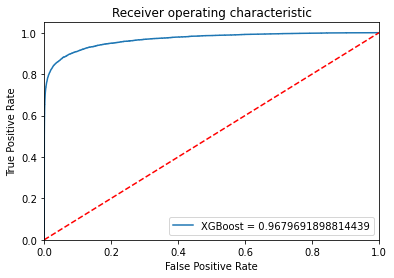

In [51]:
XGboost_roc_auc = roc_auc_score(Y_test,result_xgb_proba)
auc = metrics.roc_auc_score(Y_test,result_xgb_proba)
fpr, tpr, thresholds = roc_curve(Y_test, result_xgb_proba)
plt.figure()
plt.plot(fpr, tpr, label='XGBoost = '+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGBoost_ROC')
plt.show()

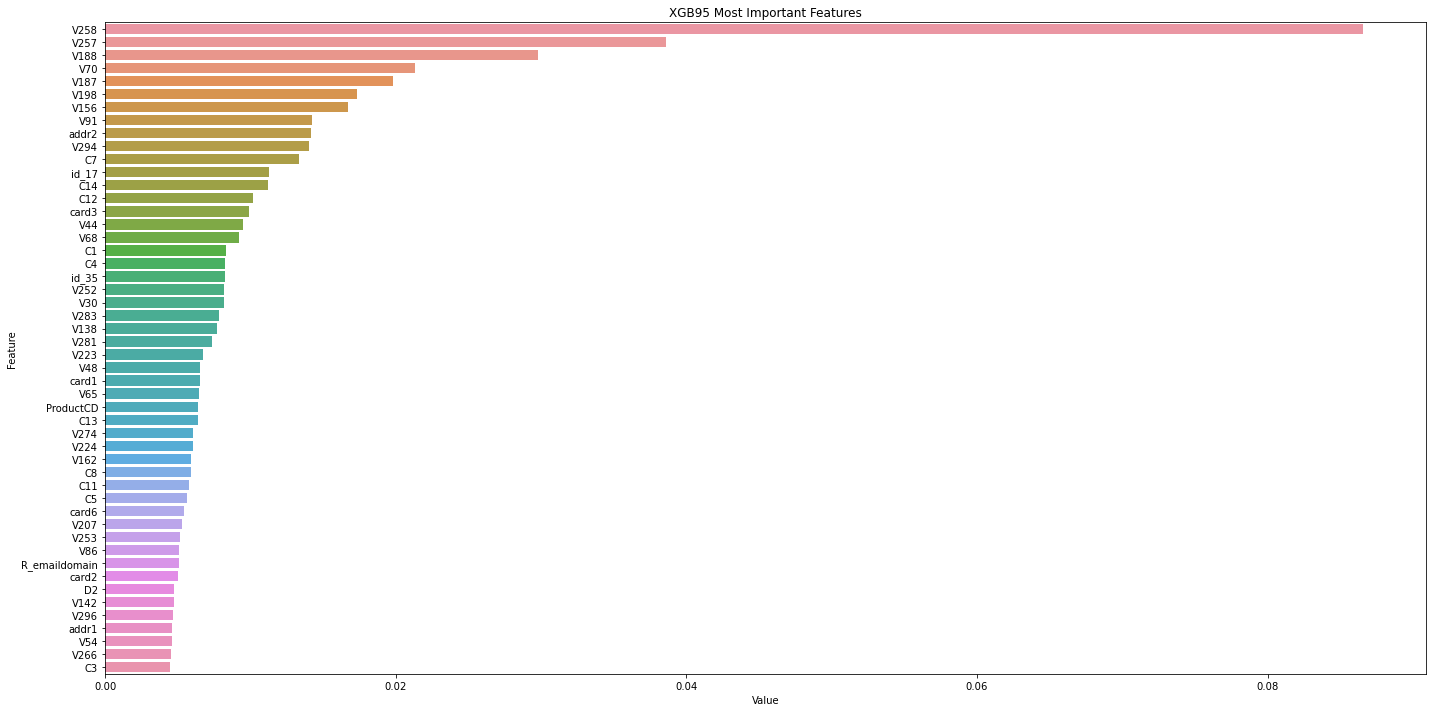

In [52]:
feature_imp = pd.DataFrame(sorted(zip(xgb_model.feature_importances_,cols)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:50])
plt.title('XGB95 Most Important Features')
plt.tight_layout()
plt.show()
del xgb_model, h ,confusion_matrix_xgb; x=gc.collect()

### Data Processing 2

Obviously  id_33 screen resolution ratio has nothing to do with the fraud rate
DeviceInfo 

In [53]:
X_2 = X.drop('id_33',axis = 1)
X_2 = X_2.drop('DeviceInfo', axis = 1)
Y_2 = Y

In [54]:
cols_category.remove('id_33')

In [55]:
cols_category.remove('DeviceInfo')

In [56]:
X_2.shape

(590540, 211)

we notice the sample data is imbalanced. we use SMOTE to make the dataset balanced

# Data Processing

In [57]:
# Label Encoding for categorical variables.
X_2[cols_category] = X_2[cols_category].astype('category')

from sklearn import preprocessing
for f in X_2[cols_category].columns:
    if X_2[f].dtype=='category': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_2[f].values))
        X_2[f] = lbl.transform(list(X_2[f].values))

In [58]:
X_2[cols_category] = X_2[cols_category].astype('category')

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, test_size = 0.30, random_state = 110)

In [60]:
X_train.isnull().sum().sum()

0

In [61]:
X_train.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V3,V4,V6,V8,V11,V13,V14,V17,V20,V23,V26,V27,V30,V36,V37,V40,V41,V44,V47,V48,V54,V56,V59,V62,V65,V67,V68,V70,V76,V78,V80,V82,V86,V88,V89,V91,V107,V108,V111,V115,V117,V120,V121,V123,V124,V127,V129,V130,V136,V138,V139,V142,V147,V156,V162,V165,V160,V166,V178,V176,V173,V182,V187,V203,V205,V207,V215,V169,V171,V175,V180,V185,V188,V198,V210,V209,V218,V223,V224,V226,V228,V229,V235,V240,V258,V257,V253,V252,V260,V261,V264,V266,V267,V274,V277,V220,V221,V234,V238,V250,V271,V294,V284,V285,V286,V291,V297,V303,V305,V307,V309,V310,V320,V281,V283,V289,V296,V301,V314,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_34,id_35,id_36,id_37,id_38,DeviceType
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3478475,12835379,107.95,4,10948,414,43,4,109,2,18,63,-999.0,-999.0,10,0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,5.0,1.0,112.0,112.0,25.0,112.0,25.0,-999.0,-999.0,-999.0,-999.0,112.0,-999.0,-999.0,-999.0,-999.0,112.0,0,0,0,0,0,2,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,107.949997,0.0,107.949997,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,107.949997,0.0,107.949997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3487299,13116781,85.00,4,2328,455,43,4,109,3,53,63,-999.0,-999.0,17,0,104.0,87.0,0.0,0.0,107.0,76.0,0.0,0.0,68.0,0.0,70.0,0.0,495.0,90.0,377.0,377.0,12.0,377.0,12.0,-999.0,-999.0,-999.0,-999.0,377.0,-999.0,-999.0,-999.0,-999.0,377.0,0,0,0,0,0,2,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,335.000000,0.0,335.000000,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,335.000000,0.0,335.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3021745,854797,57.95,4,13431,467,43,3,103,2,133,63,2.0,-999.0,17,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,-999.0,-999.0,-999.0,0.0,2,2,2,0,0,2,1,1,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.000000,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,

In [62]:
from imblearn.over_sampling import RandomOverSampler

ran=RandomOverSampler()
X_train,Y_train= ran.fit_resample(X_train,Y_train)
#sm = SMOTE(sampling_strategy =1,random_state=110,n_jobs= -1)
#X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [63]:
X_train.isnull().sum().sum()

0

### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rfy = rf_model.predict(X_test)


In [65]:
rfy_proba = rf_model.predict_proba(X_test)[:,1]

In [66]:
confusion_matrix_rf = confusion_matrix(Y_test,rfy)
print(confusion_matrix_rf)
print(classification_report(Y_test,rfy))

[[170725    224]
 [  2867   3346]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170949
           1       0.94      0.54      0.68      6213

    accuracy                           0.98    177162
   macro avg       0.96      0.77      0.84    177162
weighted avg       0.98      0.98      0.98    177162



In [67]:
mean = accuracy_score(Y_test,rfy)
print("Accuracy Score:",mean)
print("Precision:", metrics.precision_score(Y_test, rfy))
print("Recall:", metrics.recall_score(Y_test,rfy))
print("F1 Score:",f1_score(Y_test, rfy))
print("AUC Score:", roc_auc_score(Y_test,rfy_proba))

Accuracy Score: 0.982552691886522
Precision: 0.9372549019607843
Recall: 0.5385482053758249
F1 Score: 0.6840437493611368
AUC Score: 0.9441689187791596


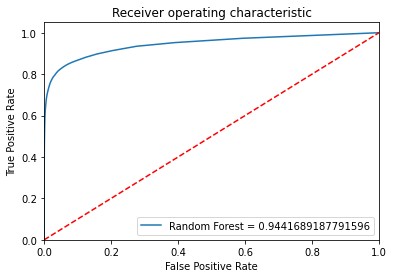

In [68]:
randomforest_roc_auc = roc_auc_score(Y_test,rfy_proba)
auc = metrics.roc_auc_score(Y_test, rfy_proba)
fpr, tpr, thresholds = roc_curve(Y_test, rfy_proba)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest = '+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Random_Forest_ROC')
plt.show()

### Logistic Regression

In [69]:
import statsmodels.api as sm
logit=sm.Logit(Y_train,X_train)
result = logit.fit()
print(result.summary2())

         Current function value: 0.462364
         Iterations: 35


C:\Users\vince\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.333      
Dependent Variable:  isFraud          AIC:              738221.9443
Date:                2022-03-20 20:24 BIC:              740667.3675
No. Observations:    797856           Log-Likelihood:   -3.6890e+05
Df Model:            210              LL-Null:          -5.5303e+05
Df Residuals:        797645           LLR p-value:      0.0000     
Converged:           0.0000           Scale:            1.0000     
No. Iterations:      35.0000                                       
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------------
TransactionDT    0.0000   0.0000   55.5569 0.0000   0.0000   0.0000
TransactionAmt   0.0009   0.0000   64.9264 0.0000   0.0008   0.0009
ProductCD       -0.0258   0.0101   -2.5533 0.0107  -0.0456  -0.0060
card1  

In [70]:
odds_ratio=np.exp(result.params)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(odds_ratio)

TransactionDT     1.000000e+00
TransactionAmt    1.000873e+00
ProductCD         9.745279e-01
card1             9.999912e-01
card2             9.997804e-01
card3             1.018842e+00
card4             1.132735e+00
card5             1.001411e+00
card6             4.858628e-01
addr1             1.000517e+00
addr2             9.939538e-01
dist1             1.000175e+00
dist2             1.000030e+00
P_emaildomain     9.996935e-01
R_emaildomain     1.001783e+00
C1                9.882699e-01
C2                1.001749e+00
C3                2.911201e-02
C4                1.019126e+00
C5                1.013082e+00
C6                9.824199e-01
C7                9.920910e-01
C8                1.035782e+00
C9                1.056017e+00
C10               9.952989e-01
C11               1.069322e+00
C12               9.664469e-01
C13               1.002034e+00
C14               8.990155e-01
D1                9.986050e-01
D2                1.000014e+00
D3                1.000227e+00
D4      

In [71]:
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
logy = lr_model.predict(X_test)
confusion_matrix_log= confusion_matrix(Y_test,logy)
print(confusion_matrix_log)
print(classification_report(Y_test,logy))

C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[132104  38845]
 [  2542   3671]]
              precision    recall  f1-score   support

           0       0.98      0.77      0.86    170949
           1       0.09      0.59      0.15      6213

    accuracy                           0.77    177162
   macro avg       0.53      0.68      0.51    177162
weighted avg       0.95      0.77      0.84    177162



In [72]:
from sklearn.metrics import f1_score
print("Accuracy Score:",accuracy_score(Y_test, logy))
print("Precision:", metrics.precision_score(Y_test, logy))
print("Recall:", metrics.recall_score(Y_test, logy))
print("F1 Score:",f1_score(Y_test, logy))
print("AUC Score:", roc_auc_score(Y_test,lr_model.predict_proba(X_test)[:,1]))

Accuracy Score: 0.7663889547419875
Precision: 0.08634396462508233
Recall: 0.590857878641558
F1 Score: 0.15067003221900718
AUC Score: 0.7298706249731424


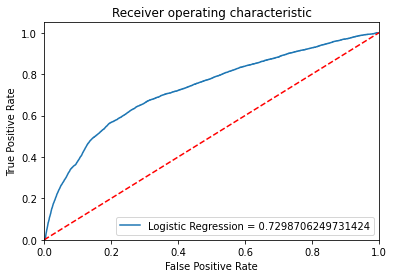

In [73]:
logit_roc_auc = roc_auc_score(Y_test,lr_model.predict_proba(X_test)[:,1])
auc = metrics.roc_auc_score(Y_test, lr_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, lr_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression = '+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [74]:
lr_model.predict_proba(X_test)[:,1]

array([0.3676303 , 0.64088136, 0.43916403, ..., 0.58961689, 0.29508927,
       0.44211263])

### XGBoost

In [75]:
xgb_model_new = xgb.XGBClassifier( 
        n_estimators=2000,
        max_depth=12, 
        learning_rate=0.02, 
        subsample=0.8,
        colsample_bytree=0.4, 
        missing=-1, 
        eval_metric='auc',
        # USE CPU
        #nthread=4,
        #tree_method='hist' 
        # USE GPU
        tree_method='gpu_hist',
        enable_categorical=True
    )
h_new = xgb_model_new.fit(X_train, Y_train, 
    eval_set=[(X_train,Y_train)],
    verbose=50, early_stopping_rounds=100)

result_xgb_new =xgb_model_new.predict(X_test)
result_xgb_proba_new=xgb_model_new.predict_proba(X_test)[:,1]

C:\Users\vince\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\vince\anaconda3\lib\site-packages\xgboost\data.py:290: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
C:\Users\vince\anaconda3\lib\site-packages\xgboost\data.py:284: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

[0]	validation_0-auc:0.90715
[50]	validation_0-auc:0.95826
[100]	validation_0-auc:0.97033
[150]	validation_0-auc:0.97822
[200]	validation_0-auc:0.98364
[250]	validation_0-auc:0.98709
[300]	validation_0-auc:0.98907
[350]	validation_0-auc:0.99008
[400]	validation_0-auc:0.99095
[450]	validation_0-auc:0.99159
[500]	validation_0-auc:0.99225
[550]	validation_0-auc:0.99290
[600]	validation_0-auc:0.99336
[650]	validation_0-auc:0.99396
[700]	validation_0-auc:0.99438
[750]	validation_0-auc:0.99474
[800]	validation_0-auc:0.99511
[850]	validation_0-auc:0.99553
[900]	validation_0-auc:0.99588
[950]	validation_0-auc:0.99609
[1000]	validation_0-auc:0.99638
[1050]	validation_0-auc:0.99661
[1100]	validation_0-auc:0.99680
[1150]	validation_0-auc:0.99697
[1200]	validation_0-auc:0.99715
[1250]	validation_0-auc:0.99728
[1300]	validation_0-auc:0.99744
[1350]	validation_0-auc:0.99755
[1400]	validation_0-auc:0.99773
[1450]	validation_0-auc:0.99785
[1500]	validation_0-auc:0.99796
[1550]	validation_0-auc:0.99807

[[167594   3355]
 [  1231   4982]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    170949
           1       0.60      0.80      0.68      6213

    accuracy                           0.97    177162
   macro avg       0.80      0.89      0.84    177162
weighted avg       0.98      0.97      0.98    177162

Accuracy Score: 0.974114087671171
Precision: 0.59757706609092
Recall: 0.8018670529534846
F1 Score: 0.6848109965635739
AUC Score: 0.9649868137425139


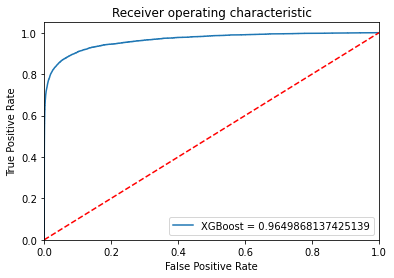

In [76]:
confusion_matrix_xgb_new = confusion_matrix(Y_test,result_xgb_new)
print(confusion_matrix_xgb_new)
print(classification_report(Y_test,result_xgb_new))
##############
mean = accuracy_score(Y_test,result_xgb_new)
print("Accuracy Score:",mean)
print("Precision:", metrics.precision_score(Y_test,result_xgb_new))
print("Recall:", metrics.recall_score(Y_test,result_xgb_new))
print("F1 Score:",f1_score(Y_test,result_xgb_new))
print("AUC Score:", roc_auc_score(Y_test,result_xgb_proba_new))
##############
XGboost_roc_auc = roc_auc_score(Y_test,result_xgb_proba_new)
auc = metrics.roc_auc_score(Y_test,result_xgb_proba_new)
fpr, tpr, thresholds = roc_curve(Y_test, result_xgb_proba_new)
plt.figure()
plt.plot(fpr, tpr, label='XGBoost = '+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGBoost_ROC')
plt.show()